<a href="https://colab.research.google.com/github/Surabhi-Sunil/Flight-Price-Prediction/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#Getting data ready
#Import all tools we need

#Regular EDA ( Exploratory Data Analysis )
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to be availble inside notebook
%matplotlib inline

#Models from Scikit Learn
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import  RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor,HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


#Model evaulation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_log_error,r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

import zipfile

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d shubhambathwal/flight-price-prediction

  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 91.1MB/s]


In [ ]:
!unzip /content/flight-price-prediction.zip

Archive:  /content/flight-price-prediction.zip
  inflating: Clean_Dataset.csv       
  inflating: business.csv            
  inflating: economy.csv             


In [ ]:
data= pd.read_csv("Clean_Dataset.csv",
                low_memory=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.shape

(300153, 12)

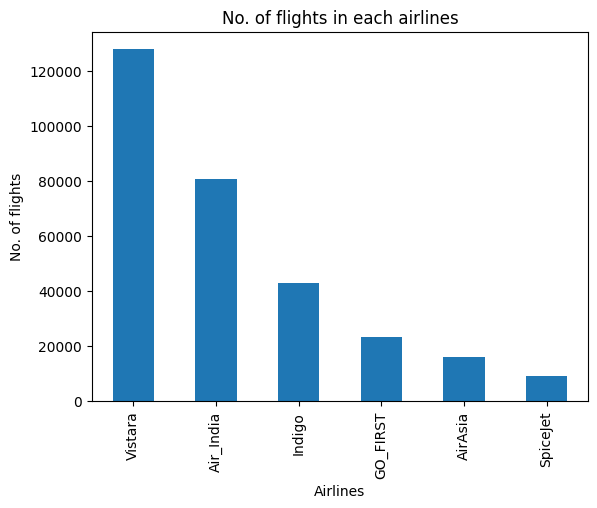

In [ ]:
#How many flights under each airlines
airline = data["airline"].value_counts()
airline.plot.bar()
plt.xlabel("Airlines")
plt.ylabel("No. of flights")
plt.title("No. of flights in each airlines")
plt.show()

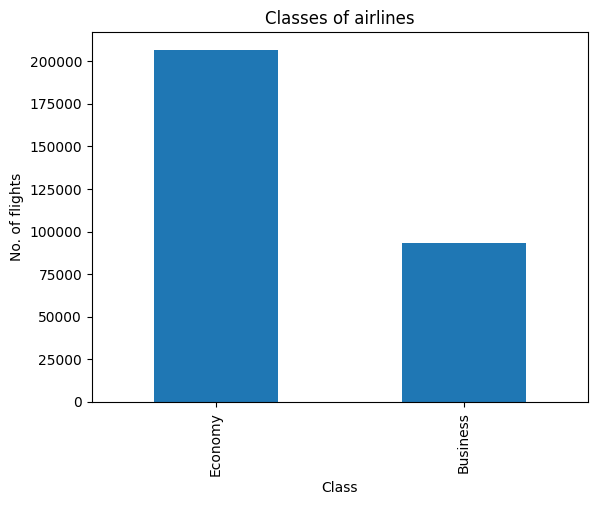

In [ ]:
#Class of the flight
airline = data["class"].value_counts()
airline.plot.bar()
plt.xlabel("Class")
plt.ylabel("No. of flights")
plt.title("Classes of airlines")
plt.show()

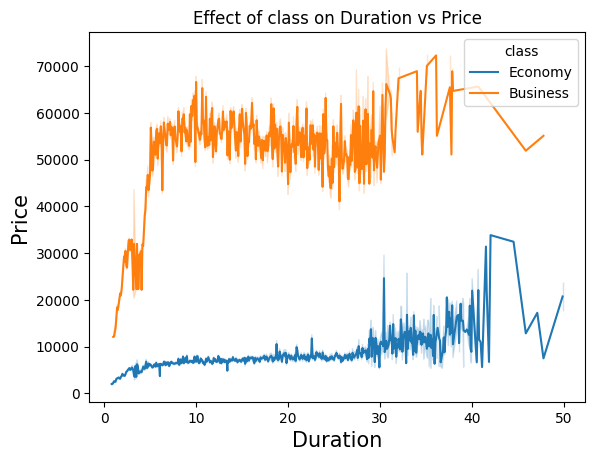

In [ ]:
#price variation based on flight duration and class
import seaborn as sns

sns.lineplot(data=data, x='duration', y='price', hue='class')
plt.xlabel("Duration", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Effect of class on Duration vs Price")
plt.show()


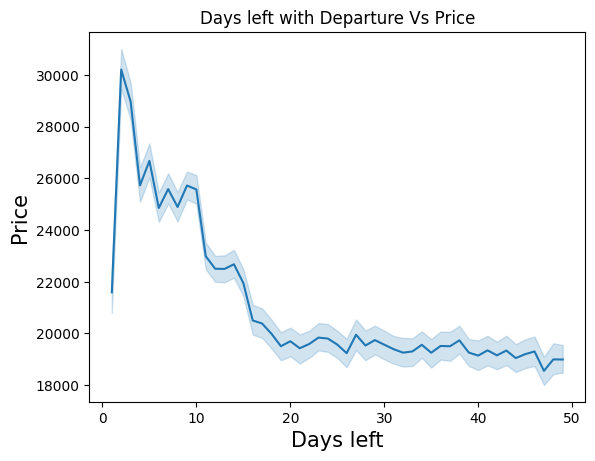

In [ ]:
#effect of No of days left on price
sns.lineplot(data=data, x='days_left', y='price')
plt.xlabel("Days left", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Days left with Departure Vs Price")
plt.show()

       airline source_city destination_city     price
0      AirAsia   Bangalore          Chennai    1603.0
1      AirAsia   Bangalore          Chennai    1715.0
2      AirAsia   Bangalore          Chennai    1822.0
3      AirAsia   Bangalore          Chennai    1925.0
4      AirAsia   Bangalore          Chennai    3499.0
...        ...         ...              ...       ...
21472  Vistara      Mumbai          Kolkata   95421.0
21473  Vistara      Mumbai          Kolkata   96765.0
21474  Vistara      Mumbai          Kolkata   97549.0
21475  Vistara      Mumbai          Kolkata   98904.0
21476  Vistara      Mumbai          Kolkata  100909.0

[21477 rows x 4 columns]


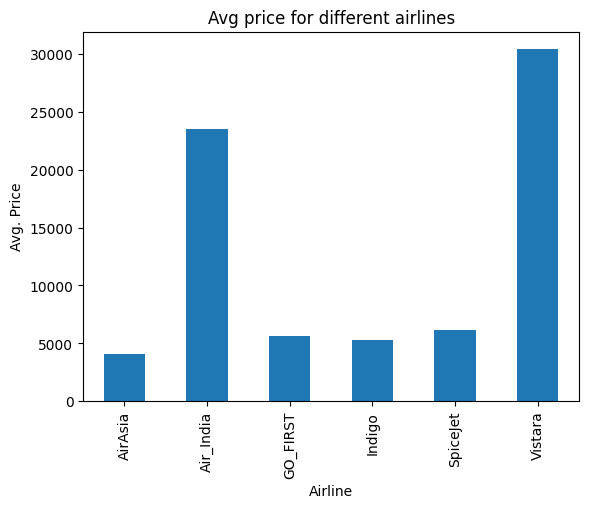

In [ ]:
#avegage price of different airlines
avg = data.groupby(['airline', 'source_city', 'destination_city','price'],
           as_index=False)["price"].mean()
avg_airline_price=data.groupby(['airline'])["price"].mean()
avg_airline_price.plot.bar()
plt.xlabel("Airline")
plt.ylabel("Avg. Price")
plt.title("Avg price for different airlines")
print(avg)
plt.show()

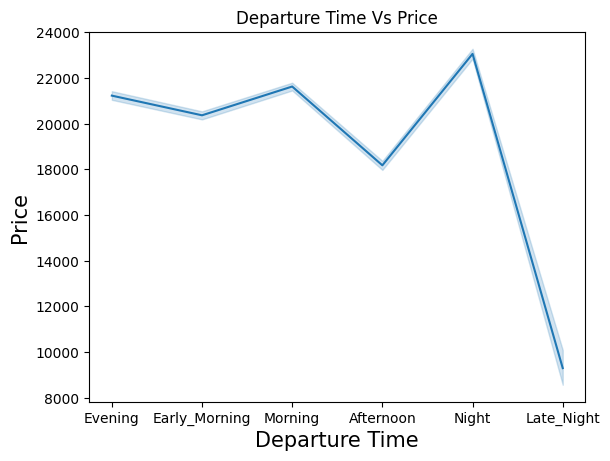

In [ ]:
# effect of departure time on price
sns.lineplot(data=data, x='departure_time', y='price')
plt.xlabel("Departure Time", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Departure Time Vs Price")
plt.show()

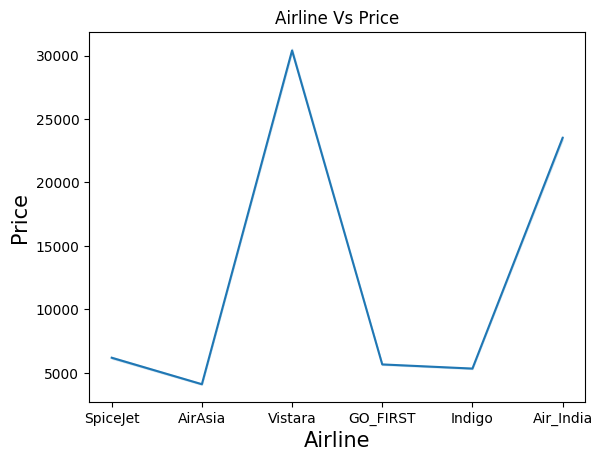

In [ ]:
#effect of airline on price
sns.lineplot(data=data, x='airline', y='price')
plt.xlabel("Airline", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Airline Vs Price")
plt.show()

In [ ]:
data= pd.read_csv("Clean_Dataset.csv",
                low_memory=False)

In [ ]:
le= LabelEncoder()
for col in data.columns:
  if data[col].dtype=='object':
    data[col] = le.fit_transform(data[col])

In [ ]:
# Splitting the data
X = data.drop('price',axis =1)
y= data['price']
# Splitting data in Train and test dataset.
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

mmscaler=MinMaxScaler(feature_range =(0,1))
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.fit_transform(X_test)

# Fitting the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the test set
pred = lr.predict(X_test)

# Calculating the accuracy
mse = mean_squared_error(y_test, pred)

mse


50125975.8825313

In [ ]:
# Fitting the model
lr = DecisionTreeRegressor()
lr.fit(X_train, y_train)

# Predicting the test set
pred = lr.predict(X_test)

# Calculating the accuracy
mse = mean_squared_error(y_test, pred)

mse

7629340.716096683

In [ ]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64